<a href="https://colab.research.google.com/github/javiervz/network_science/blob/master/graphs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**A crash course on Graph Theory :)**



A graph $G=(V,E)$ is a pair completely defined by:

1. the set of **nodes** $V\neq \emptyset$
2. the set of **edges** $E$ 

We denote $|V|=n$ and $|E|=m$. 




**Question 1:** Determine the number of edges if there is an edge for every pair of nodes of the graph $G$ 

The **density** of a graph $G$ is $$\frac{2m}{n(n-1)}$$

In [0]:
## important libraries!!!
import networkx as nx
import matplotlib.pyplot as plt

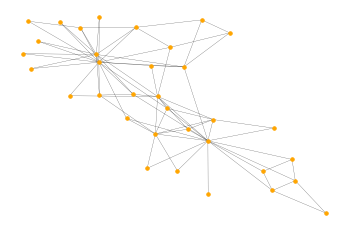

In [4]:
## an example
G = nx.karate_club_graph()

## visualization
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_size = 12, node_color='orange') 
nx.draw_networkx_edges(G, pos, alpha=0.75,width=0.25,edge_color='k')
plt.axis('off')
plt.show()

In [0]:
density=nx.density(G)

In [6]:
density

0.13903743315508021

A graph of density 1 is said to be **complete**, denoted as $K_n$ ($n$ is the size of the set of nodes)

In [0]:
def plot_graph(G):
  pos = nx.spring_layout(G)
  labels={i:i for i in G.nodes}
  nx.draw_networkx_nodes(G, pos, node_size = 200, node_color='orange') 
  nx.draw_networkx_edges(G, pos, alpha=1.,width=0.5,edge_color='k')
  nx.draw_networkx_labels(G,pos,labels,alpha=0.95,font_size=15,font_color='k')
  plt.axis('off')
  plt.show()

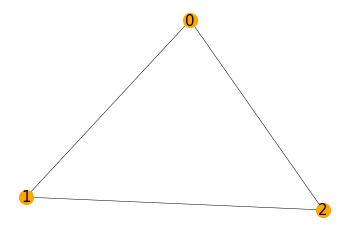

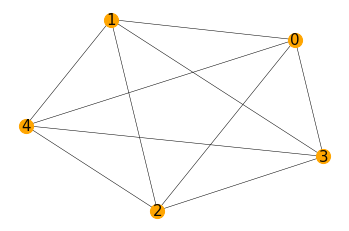

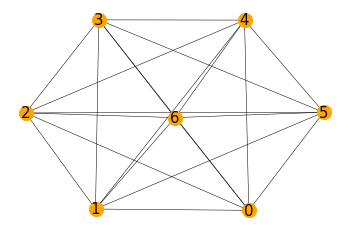

In [25]:
## complete graphs!!!
for k in [3,5,7]:
  Kn=nx.complete_graph(k)
  plot_graph(Kn)



**Question 2:** How to scales the number of edges  as a function of $n$?

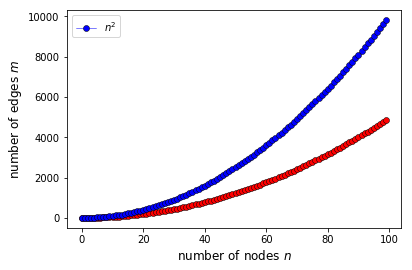

In [8]:
X=range(100)
Y=[nx.complete_graph(x) for x in X]


plt.plot(X,[nx.number_of_edges(G) for G in Y],marker='o',color='r',markersize=6,markeredgecolor='k',markeredgewidth=0.5,fillstyle='full',clip_on=True,linewidth=0.5)
plt.plot(X,[x**2 for x in X],marker='o',color='b',markersize=6,markeredgecolor='k',markeredgewidth=0.5,fillstyle='full',clip_on=True,linewidth=0.5,label=r'$n^2$')

plt.grid(False)
plt.legend(loc='best')

plt.ylabel(r'number of edges $m$',fontsize=12)
plt.xlabel(r'number of nodes $n$',fontsize=12)
plt.rcParams.update({'font.size': 10})
plt.show()

**Question 3:** How many complete graphs of $n$ nodes we can define?

Two graphs $G=(V,E)$ and $G'=(V',E')$, with $|V|=|V'|$, are said to be  **isomorphic** if there is a bijection $\phi: V \rightarrow V'$ such that if $(u,v) \in V$ iff $(\phi(u),\phi(v))
\in V'$. 

---



Two small graphs $G_1$ and $G_2$

In [0]:
G1=nx.Graph()
G2=nx.Graph()

In [0]:
G1.add_edge(1,2)
G1.add_edge(2,3)
G1.add_edge(3,4)
G1.add_edge(4,1)

In [0]:
G2.add_edge(1,2)
G2.add_edge(2,4)
G2.add_edge(4,3)
G2.add_edge(3,1)

In [12]:
G1.edges(data=True)

EdgeDataView([(1, 2, {}), (1, 4, {}), (2, 3, {}), (3, 4, {})])

In [13]:
G2.edges(data=True)

EdgeDataView([(1, 2, {}), (1, 3, {}), (2, 4, {}), (4, 3, {})])

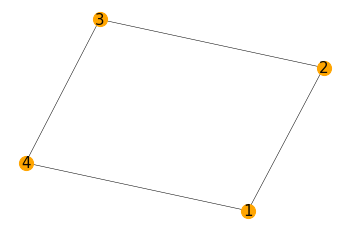

In [22]:
plot_graph(G1)

    

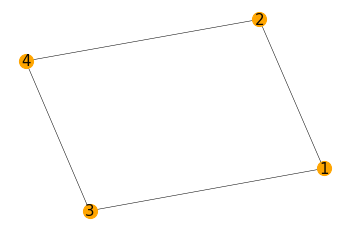

In [23]:
plot_graph(G2)

**Question 4:** Determine if $G_1$ and $G_2$ are isomorphic.  

Consider:

1. $G=(V,E)$.
2. a subset $V'\subseteq V$

Then, the **subgraph induced** by $V'$ is the pair $G'=(V',E')$, where $E'$ contains all links of $G$ that join nodes in $V'$. 

**Question 5:** Consider the complete graph $K_4$. Determine the subgraph induced by any three-node combination. 

In [0]:
K4=nx.complete_graph(4)

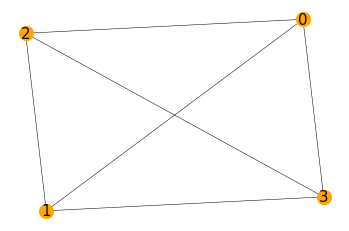

In [38]:
plot_graph(K4)

In [0]:
K4.remove_node(1)

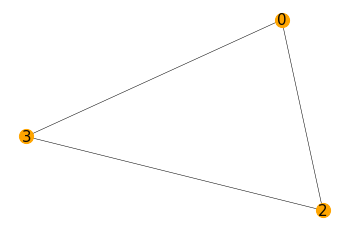

In [40]:
plot_graph(K4)